In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
def missing_values_table(df):
    # Number of missing values
    missing_val = df.isnull().sum()
    # Percentage of missing values
    missing_per = 100*df.isnull().sum()/len(df)
    missing_val_table = pd.concat([missing_val,missing_per],axis=1)
    missing_val_table_columns = missing_val_table.rename(columns={0 : 'Missing Values',1 : '% of Missing Values'})
    missing_val_table_columns = missing_val_table_columns[missing_val_table_columns.iloc[:,1] != 0].sort_values('% of Missing Values',ascending=False).round(1)
    return missing_val_table_columns

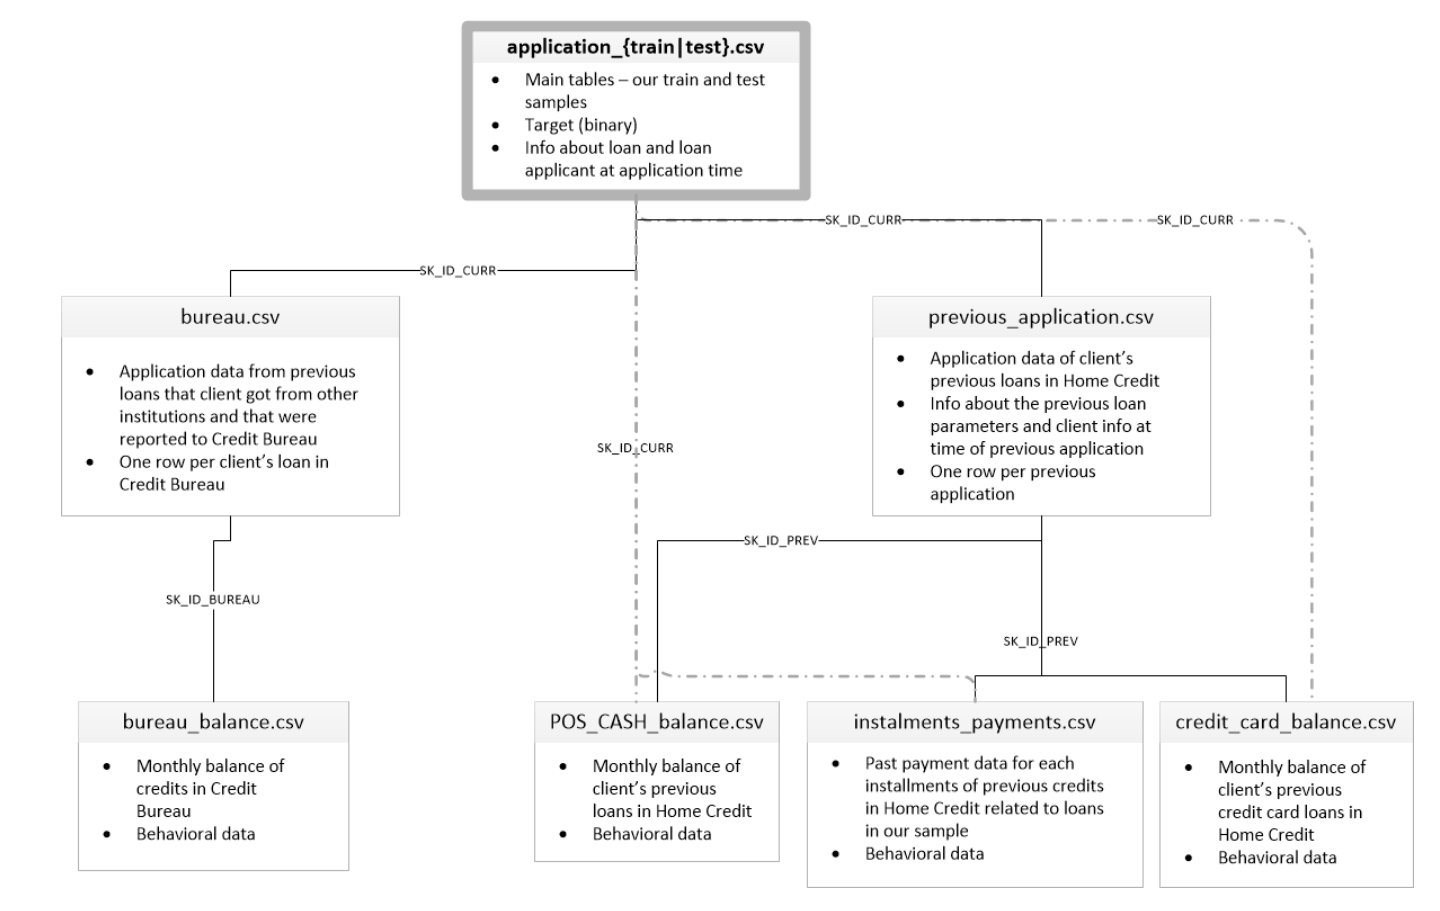

**application data**

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [135]:
APP_Train = pd.read_csv("/content/drive/MyDrive/kaggle/credit-default-risk/application_train.csv")
# APP_Test = pd.read_csv("/content/drive/MyDrive/kaggle/credit-default-risk/application_test.csv")
# APP_Train=APP_Test.copy()

1.Data Quality Checking

data format content, remove spaces, special symbol

In [136]:
APP_Train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [137]:
APP_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


2.Data Logic Checking

SK_ID_CURR is the unique id in trainset

In [138]:
print("Check that SK_ID_CURR is indeed a primary key")
print()
print("APP_Train.len",len(APP_Train))
print("APP_Train.SK_ID_CURR.nunique",APP_Train.SK_ID_CURR.nunique())

Check that SK_ID_CURR is indeed a primary key

APP_Train.len 307511
APP_Train.SK_ID_CURR.nunique 307511


3. Missing Value Processing

In [139]:
# Replace null with np.nan
APP_Train.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=True)

In [140]:
pd.set_option("display.max_rows",None)
print("Display train data missing values")
print()
print(missing_values_table(APP_Train))

Display train data missing values

                              Missing Values  % of Missing Values
COMMONAREA_MEDI                       214865                 69.9
COMMONAREA_AVG                        214865                 69.9
COMMONAREA_MODE                       214865                 69.9
NONLIVINGAPARTMENTS_MEDI              213514                 69.4
NONLIVINGAPARTMENTS_MODE              213514                 69.4
NONLIVINGAPARTMENTS_AVG               213514                 69.4
FONDKAPREMONT_MODE                    210295                 68.4
LIVINGAPARTMENTS_MODE                 210199                 68.4
LIVINGAPARTMENTS_MEDI                 210199                 68.4
LIVINGAPARTMENTS_AVG                  210199                 68.4
FLOORSMIN_MODE                        208642                 67.8
FLOORSMIN_MEDI                        208642                 67.8
FLOORSMIN_AVG                         208642                 67.8
YEARS_BUILD_MODE                      204

In [141]:
print("Counts per target category")
print()
print(APP_Train.TARGET.value_counts())
print()
print("Proportion of minority to majority target class")
print()
print(APP_Train.TARGET.value_counts()[1]/APP_Train.TARGET.value_counts()[0])

Counts per target category

0    282686
1     24825
Name: TARGET, dtype: int64

Proportion of minority to majority target class

0.08781828601345662


This is an imbalanced dataset with too many missing values. Since Finally we would preserve the proportion of target 0 to 1. Try to calculate missing values by rows to remove rows to reduce missing value rate.

In [142]:
APP_Train_NAN_TARGET1 = pd.DataFrame(data=APP_Train[APP_Train.TARGET==1].isnull().sum(axis=1),columns=['num'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe93d5aa250>]],
      dtype=object)

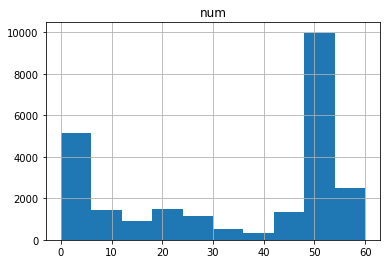

In [143]:
APP_Train_NAN_TARGET1.hist()

In [144]:
APP_Train_NAN_TARGET0 = pd.DataFrame(data=APP_Train[APP_Train.TARGET==0].isnull().sum(axis=1),columns=['num'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe93d555ad0>]],
      dtype=object)

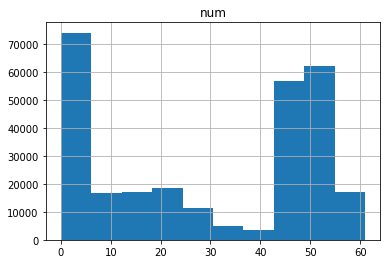

In [145]:
APP_Train_NAN_TARGET0.hist()

In [146]:
for i in np.arange(0,60):
    for j in np.arange(0,60):
        if round(int(APP_Train_NAN_TARGET1[APP_Train_NAN_TARGET1.num<=i].count())/int(APP_Train_NAN_TARGET0[APP_Train_NAN_TARGET0.num<=j].count()),5) == 0.08838:
            print("Max number on NAN for target 1:",i,"Max number on NAN for target 0:",j,"Proportion of minority to majority target class:",float(APP_Train_NAN_TARGET1[APP_Train_NAN_TARGET1.num<=i].count()/APP_Train_NAN_TARGET0[APP_Train_NAN_TARGET0.num<=j].count()))
        else:
            pass

Max number on NAN for target 1: 29 Max number on NAN for target 0: 20 Proportion of minority to majority target class: 0.08837994759703688


In [147]:
print("Number of remaining target 1 samples")
print(APP_Train_NAN_TARGET1[APP_Train_NAN_TARGET1.num<=19].count())

Number of remaining target 1 samples
num    8227
dtype: int64


In [148]:
print("Number of remaining target 0 samples")
print(APP_Train_NAN_TARGET0[APP_Train_NAN_TARGET0.num<=15].count())

Number of remaining target 0 samples
num    93862
dtype: int64


In [149]:
print("Check proportion is consistent")
print()
APP_Train_NAN_TARGET1[APP_Train_NAN_TARGET1.num<=19].count()/APP_Train_NAN_TARGET0[APP_Train_NAN_TARGET0.num<=15].count()

Check proportion is consistent



num    0.08765
dtype: float64

In [150]:
# Subset row indices where target classs == 1 that have 19 or less NAN values
APP_Train_indexlist_TARGET1 = APP_Train_NAN_TARGET1[APP_Train_NAN_TARGET1.num<=19].index
# Subset row indices where target classs == 1 that have 15 or less NAN values
APP_Train_indexlist_TARGET0 = APP_Train_NAN_TARGET0[APP_Train_NAN_TARGET0.num<=15].index
# Consolidated row indices list
APP_Train_indexlist = APP_Train_indexlist_TARGET1.append(APP_Train_indexlist_TARGET0)

In [151]:
# Select rows according to index
APP_Train_Cleaned_New = APP_Train.iloc[APP_Train_indexlist,:]
APP_Train_Cleaned_New.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,NaN,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.548477,0.190706,0.0165,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0265,NaN,0.0094,NaN,0.0000,0.0168,0.0092,0.9732,NaN,NaN,0.0000,0.0690,0.0417,NaN,0.0271,NaN,0.0083,NaN,0.0000,0.0167,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0270,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0085,Wooden,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.306841,0.320163,0.1309,0.1250,0.9960,0.9456,0.0822,0.16,0.1379,0.2500,0.2917,0.0142,0.1059,0.1267,0.0039,0.0078,0.1334,0.1297,0.9960,0

In [ ]:
# Save to csv file (new), comment this out once done
# APP_Train_Cleaned_New.to_csv("application_train_cleaned_new.csv")

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
def missing_values_table(df):
    # Number of missing values
    missing_val = df.isnull().sum()
    # Percentage of missing values
    missing_per = 100*df.isnull().sum()/len(df)
    missing_val_table = pd.concat([missing_val,missing_per],axis=1)
    missing_val_table_columns = missing_val_table.rename(columns={0 : 'Missing Values',1 : '% of Missing Values'})
    missing_val_table_columns = missing_val_table_columns[missing_val_table_columns.iloc[:,1] != 0].sort_values('% of Missing Values',ascending=False).round(1)
    return missing_val_table_columns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read csv file (new)
APP_Train_Cleaned_New = pd.read_csv("/content/drive/MyDrive/AN8002 Team 3/application_train_cleaned_new.csv")
APP_Train_Cleaned_New.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,4,rexddr,1,Cash loans,F,N,Y,0,90000.0,113760.0,8406.0,90000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020713,-18393,-1694,-8279.0,-1890,NaN,1,1,1,1,0,0,Sales staff,2.0,3,3,SATURDAY,12,0,0,0,0,0,...,0.3249,0.5061,0.0233,0.0357,reg oper account,block of flats,0.4617,Panel,No,3.0,0.0,3.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
1,98,e6brd7,1,Cash loans,M,N,Y,1,135000.0,755190.0,32125.5,675000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.020713,-11637,-982,-587.0,-930,NaN,1,1,0,1,0,0,Laborers,3.0,3,2,TUESDAY,12,0,0,0,0,0,...,0.1274,0.1743,0.0155,0.0139,reg oper account,block of flats,0.1578,Panel,No,1.0,0.0,1.0,0.0,-815.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,163,abrxr7,1,Cash loans,F,N,Y,0,202500.0,668304.0,28444.5,540000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-17855,-507,-5844.0,-1349,NaN,1,1,0,1,0,0,Laborers,1.0,3,3,TUESDAY,12,0,0,0,0,0,...,NaN,0.3627,NaN,0.0585,NaN,block of flats,0.3205,Panel,No,3.0,1.0,3.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
3,177,oooudx,1,Cash loans,F,N,N,0,67500.0,450000.0,32746.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.010556,-11448,-1066,-5217.0,-3955,NaN,1,1,1,1,1,0,NaN,2.0,3,3,THURSDAY,10,0,0,0,0,0,...,NaN,0.0144,NaN,0.0410,NaN,block of flats,0.0199,"Stone, brick",No,0.0,0.0,0.0,0.0,-938.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
4,254,br667r,1,Cash loans,M,N,Y,0,121500.0,772686.0,25056.0,553500.0,Family,Pensioner,Higher education,Married,House / apartment,0.006852,-20927,365243,-7404.0,-4415,NaN,1,0,0,1,0,0,NaN,2.0,3,3,WEDNESDAY,6,0,0,0,0,0,...,0.0941,0.1119,0.0000,0.0000,reg oper account,block of flats,0.0947,"Stone, brick",No,0.0,0.0,0.0,0.0,-1948.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [101]:
# for test table
APP_Train_Cleaned_New=APP_Train.copy()

In [156]:
#remove SK_ID_CURR
APP_Train_Cleaned = APP_Train_Cleaned_New.copy().iloc[:,1:]
APP_Train_Cleaned.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,NaN,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.548477,0.190706,0.0165,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0265,NaN,0.0094,NaN,0.0000,0.0168,0.0092,0.9732,NaN,NaN,0.0000,0.0690,0.0417,NaN,0.0271,NaN,0.0083,NaN,0.0000,0.0167,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0270,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0085,Wooden,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.306841,0.320163,0.1309,0.1250,0.9960,0.9456,0.0822,0.16,0.1379,0.2500,0.2917,0.0142,0.1059,0.1267,0.0039,0.0078,0.1334,0.1297,0.9960,0.9477,0.0830,0.1611,0.1379,0.250

In [157]:
pd.set_option("display.max_rows",None)
print("Display train data missing values")
print()
print(missing_values_table(APP_Train_Cleaned))

Display train data missing values

                              Missing Values  % of Missing Values
OWN_CAR_AGE                            68265                 66.9
EXT_SOURCE_1                           54473                 53.4
OCCUPATION_TYPE                        31769                 31.1
EXT_SOURCE_3                           18297                 17.9
AMT_REQ_CREDIT_BUREAU_YEAR             11714                 11.5
AMT_REQ_CREDIT_BUREAU_WEEK             11714                 11.5
AMT_REQ_CREDIT_BUREAU_DAY              11714                 11.5
AMT_REQ_CREDIT_BUREAU_HOUR             11714                 11.5
AMT_REQ_CREDIT_BUREAU_MON              11714                 11.5
AMT_REQ_CREDIT_BUREAU_QRT              11714                 11.5
COMMONAREA_AVG                         10125                  9.9
COMMONAREA_MEDI                        10125                  9.9
COMMONAREA_MODE                        10125                  9.9
NONLIVINGAPARTMENTS_AVG                 8

The First two columns has too many missing values that had better remove.

In [158]:
APP_Train_Cleaned = APP_Train_Cleaned[APP_Train_Cleaned.columns[~APP_Train_Cleaned.columns.isin(["OWN_CAR_AGE","EXT_SOURCE_1"])]]

4. Check Category/Continuous Values whether need to be cut into groups

In [159]:
pd.set_option("display.max_columns",None)
APP_Train_Cleaned.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,0.0165,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0265,NaN,0.0094,NaN,0.0000,0.0168,0.0092,0.9732,NaN,NaN,0.0000,0.0690,0.0417,NaN,0.0271,NaN,0.0083,NaN,0.0000,0.0167,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0270,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0085,Wooden,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.1309,0.1250,0.9960,0.9456,0.0822,0.16,0.1379,0.2500,0.2917,0.0142,0.1059,0.1267,0.0039,0.0078,0.1334,0.1297,0.9960,0.9477,0.0830,0.1611,0.1379,0.2500,0.2917,0.0145,0.1157,0.1320,0.0039,0.0082,0.1322,0.1

In [160]:
APP_Train_Cleaned.shape

(102089, 119)

Category Columns

In [161]:
Categorical_List = ["NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","WEEKDAY_APPR_PROCESS_START","ORGANIZATION_TYPE","FONDKAPREMONT_MODE","HOUSETYPE_MODE","WALLSMATERIAL_MODE","EMERGENCYSTATE_MODE"]

In [162]:
APP_Train_Cleaned_Categorical = APP_Train_Cleaned.loc[:,Categorical_List]

In [163]:
def count_with_dictionary(list_):
    dictionary = {}
    for i in list_:
        if i in dictionary:
            dictionary[i] = dictionary[i] + 1
        else:
            dictionary[i] = 1
    return dictionary

In [164]:
for i in list(APP_Train_Cleaned_Categorical.columns):
    if APP_Train_Cleaned_Categorical[i].dtypes == "O":
        dictionary = count_with_dictionary(list(APP_Train_Cleaned_Categorical[i]))
        list_of_lists = list(map(list,dictionary.items()))
        print(i)
        print(pd.DataFrame(list_of_lists,columns = ["Category","Count"]).sort_values(by = ["Count"],ascending = False))
        print()

NAME_CONTRACT_TYPE
          Category  Count
0       Cash loans  91502
1  Revolving loans  10587

CODE_GENDER
  Category  Count
1        F  68190
0        M  33897
2      XNA      2

FLAG_OWN_CAR
  Category  Count
0        N  68265
1        Y  33824

FLAG_OWN_REALTY
  Category  Count
0        Y  71884
1        N  30205

NAME_TYPE_SUITE
          Category  Count
0    Unaccompanied  84308
3           Family  11988
2  Spouse, partner   3343
5         Children   1047
4          Other_B    539
6              NaN    458
1          Other_A    323
7  Group of people     83

NAME_INCOME_TYPE
               Category  Count
0               Working  50403
1  Commercial associate  27076
2             Pensioner  17760
3         State servant   6834
4            Unemployed      7
6           Businessman      5
5               Student      4

NAME_EDUCATION_TYPE
                        Category  Count
0  Secondary / secondary special  67362
2               Higher education  29871
1              Incomp

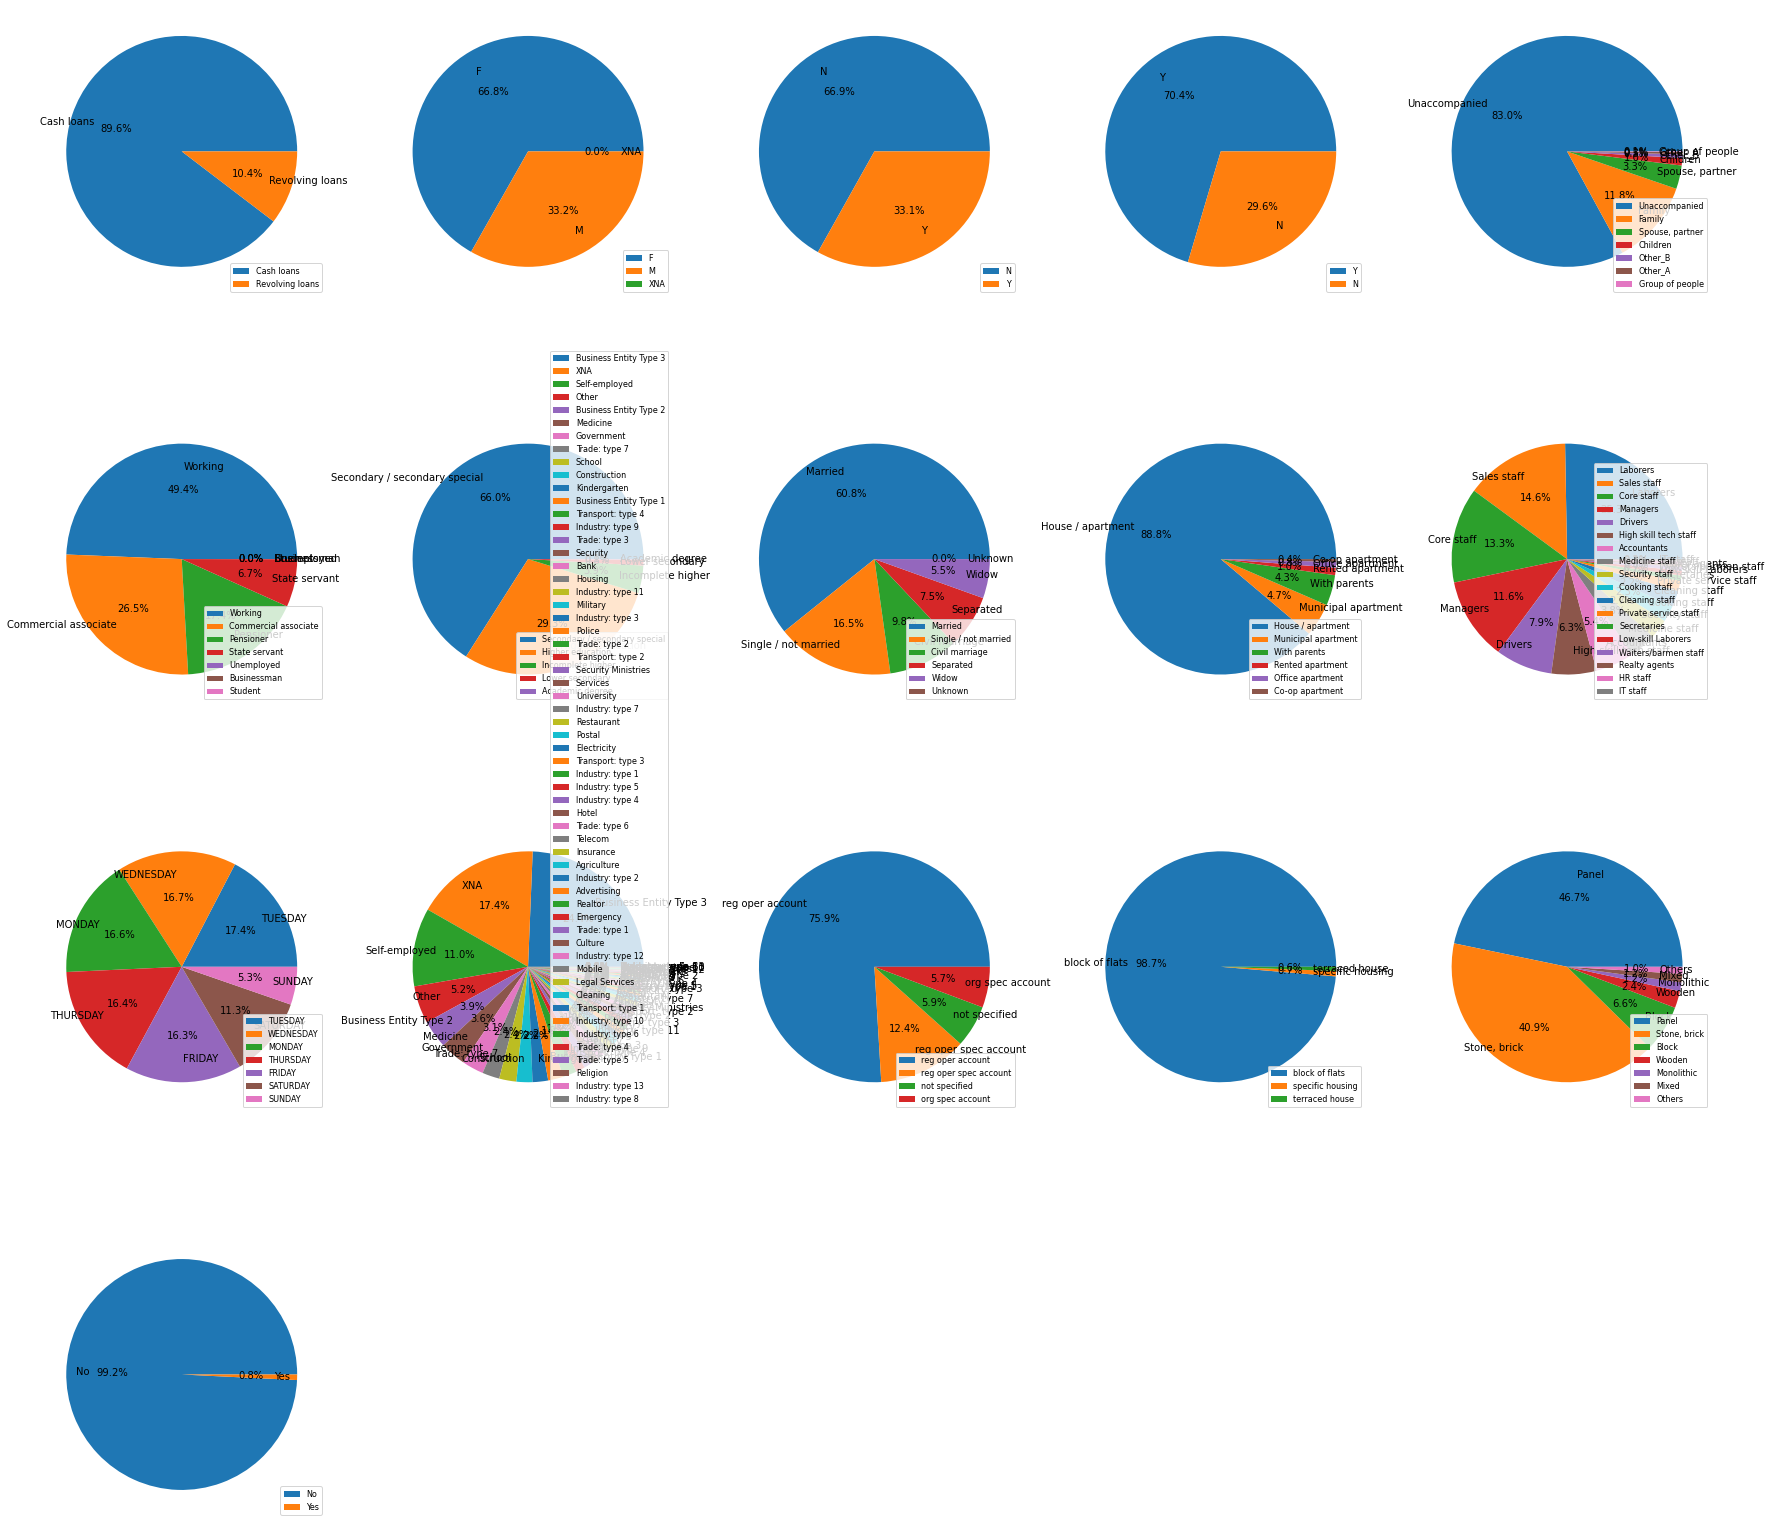

In [165]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig = plt.figure(figsize=(30,30))
for i in range(1,len(Categorical_List)+1):
    ax = fig.add_subplot(4,5,i)
    df0 = APP_Train_Cleaned_Categorical.loc[:,Categorical_List[i-1]]
    labels = df0.value_counts().index
    # print(Categorical_List[i-1])
    # print(labels)
    # labels=my_level_list(df0)
    sizes = df0.value_counts().values
    ax.pie(sizes,autopct='%1.1f%%',labels=labels,labeldistance=0.8)
    # labels=labels
    ax.legend(labels,loc='lower right',fontsize=8)
# ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
fig.subplots_adjust(hspace=0,wspace=0.2)
plt.show()

Had better to reduce the number of categories where necessary

In [166]:
# CODE_GENDER: Remove XNA as there are only 2 such rows
# NAME_TYPE_SUITE: Other_A, Other_B, NaN combined to Unspecified
# NAME_INCOME_TYPE: Unemployed, Businessman, Student combined to Not Working
#                   Note that even so Not Working has only 12 instances: Make sure that both train and test set has at least one instance later on
# OCCUPATION_TYPE: NaN renamed as Unspecified
# ORGANIZATION_TYPE: Combine all Business Entity together
#                    Combine all Industry together
#                    Combine all Trade together
#                    Combine all Transport together
#                    Other and XNA combined to Unspecified
#                    Note that Religion only has 8 instances: Make sure that both train and test set has at least one instance later on
# FONDKAPREMONT_MODE: NaN combined with not specified
# HOUSETYPE_MODE: NaN renamed as Unspecified
# WALLSMATERIAL_MODE: Others and NaN combined to Unspecified

APP_Train_Cleaned = APP_Train_Cleaned[~APP_Train_Cleaned.CODE_GENDER.str.contains(pat = "XNA")]
APP_Train_Cleaned["NAME_TYPE_SUITE"].replace({"Other_A": "Unspecified","Other_B": "Unspecified",np.nan: "Unspecified"},inplace = True)
APP_Train_Cleaned["NAME_INCOME_TYPE"].replace({"Unemployed": "Not Working","Businessman": "Not Working","Student": "Not Working"},inplace = True)
APP_Train_Cleaned["OCCUPATION_TYPE"].replace({np.nan: "Unspecified"},inplace = True)
APP_Train_Cleaned["ORGANIZATION_TYPE"].replace({"Business Entity Type 1": "Business Entity","Business Entity Type 2": "Business Entity","Business Entity Type 3": "Business Entity"},inplace = True)
APP_Train_Cleaned["ORGANIZATION_TYPE"].replace({"Industry: type 1": "Industry","Industry: type 2": "Industry","Industry: type 3": "Industry",
                                                "Industry: type 4": "Industry","Industry: type 5": "Industry","Industry: type 6": "Industry",
                                                "Industry: type 7": "Industry","Industry: type 8": "Industry","Industry: type 9": "Industry",
                                                "Industry: type 10": "Industry","Industry: type 11": "Industry","Industry: type 12": "Industry","Industry: type 13": "Industry"},inplace = True)
APP_Train_Cleaned["ORGANIZATION_TYPE"].replace({"Trade: type 1": "Trade","Trade: type 2": "Trade","Trade: type 3": "Trade",
                                                "Trade: type 4": "Trade","Trade: type 5": "Trade","Trade: type 6": "Trade","Trade: type 7": "Trade"},inplace = True)
APP_Train_Cleaned["ORGANIZATION_TYPE"].replace({"Transport: type 1": "Transport","Transport: type 2": "Transport","Transport: type 3": "Transport","Transport: type 4": "Transport"},inplace = True)
APP_Train_Cleaned["ORGANIZATION_TYPE"].replace({"Other": "Unspecified","XNA": "Unspecified"},inplace = True)
APP_Train_Cleaned["FONDKAPREMONT_MODE"].replace({np.nan: "not specified"},inplace = True)
APP_Train_Cleaned["HOUSETYPE_MODE"].replace({np.nan: "Unspecified"},inplace = True)
APP_Train_Cleaned["WALLSMATERIAL_MODE"].replace({"Others": "Unspecified",np.nan: "Unspecified"},inplace = True)

In [167]:
APP_Train_Cleaned_Categorical = APP_Train_Cleaned.loc[:,Categorical_List]

In [168]:
for i in list(APP_Train_Cleaned_Categorical.columns):
    if APP_Train_Cleaned_Categorical[i].dtypes == "O":
        dictionary = count_with_dictionary(list(APP_Train_Cleaned_Categorical[i]))
        list_of_lists = list(map(list,dictionary.items()))
        print(i)
        print(pd.DataFrame(list_of_lists,columns = ["Category","Count"]).sort_values(by = ["Count"],ascending = False))
        print()

NAME_CONTRACT_TYPE
          Category  Count
0       Cash loans  91502
1  Revolving loans  10585

CODE_GENDER
  Category  Count
1        F  68190
0        M  33897

FLAG_OWN_CAR
  Category  Count
0        N  68264
1        Y  33823

FLAG_OWN_REALTY
  Category  Count
0        Y  71882
1        N  30205

NAME_TYPE_SUITE
          Category  Count
0    Unaccompanied  84306
3           Family  11988
2  Spouse, partner   3343
1      Unspecified   1320
4         Children   1047
5  Group of people     83

NAME_INCOME_TYPE
               Category  Count
0               Working  50402
1  Commercial associate  27075
2             Pensioner  17760
3         State servant   6834
4           Not Working     16

NAME_EDUCATION_TYPE
                        Category  Count
0  Secondary / secondary special  67362
2               Higher education  29870
1              Incomplete higher   3943
3                Lower secondary    840
4                Academic degree     72

NAME_FAMILY_STATUS
             

In [169]:
print(Categorical_List)
print("Number of categorical features",len(Categorical_List))

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
Number of categorical features 16


In [170]:
for i in list(APP_Train_Cleaned.columns):
    if APP_Train_Cleaned[i].dtypes == "int64":
        print(i)
        print("Number of unique values",APP_Train_Cleaned[i].nunique())
        print("Number of missing values",APP_Train_Cleaned[i].isna().sum())
        print()

TARGET
Number of unique values 2
Number of missing values 0

CNT_CHILDREN
Number of unique values 12
Number of missing values 0

DAYS_BIRTH
Number of unique values 16997
Number of missing values 0

DAYS_EMPLOYED
Number of unique values 10167
Number of missing values 0

DAYS_ID_PUBLISH
Number of unique values 6000
Number of missing values 0

FLAG_MOBIL
Number of unique values 1
Number of missing values 0

FLAG_EMP_PHONE
Number of unique values 2
Number of missing values 0

FLAG_WORK_PHONE
Number of unique values 2
Number of missing values 0

FLAG_CONT_MOBILE
Number of unique values 2
Number of missing values 0

FLAG_PHONE
Number of unique values 2
Number of missing values 0

FLAG_EMAIL
Number of unique values 2
Number of missing values 0

REGION_RATING_CLIENT
Number of unique values 3
Number of missing values 0

REGION_RATING_CLIENT_W_CITY
Number of unique values 3
Number of missing values 0

HOUR_APPR_PROCESS_START
Number of unique values 24
Number of missing values 0

REG_REGION_NOT_L

In [171]:
Integer_Coded_List = []

for i in list(APP_Train_Cleaned.columns):
    if APP_Train_Cleaned[i].dtypes != "O" and APP_Train_Cleaned[i].nunique() <= 3:
        print(i)
        print("Number of unique values",APP_Train_Cleaned[i].nunique())
        print("Number of missing values",APP_Train_Cleaned[i].isna().sum())
        Integer_Coded_List.append(i)
        print()

TARGET
Number of unique values 2
Number of missing values 0

FLAG_MOBIL
Number of unique values 1
Number of missing values 0

FLAG_EMP_PHONE
Number of unique values 2
Number of missing values 0

FLAG_WORK_PHONE
Number of unique values 2
Number of missing values 0

FLAG_CONT_MOBILE
Number of unique values 2
Number of missing values 0

FLAG_PHONE
Number of unique values 2
Number of missing values 0

FLAG_EMAIL
Number of unique values 2
Number of missing values 0

REGION_RATING_CLIENT
Number of unique values 3
Number of missing values 0

REGION_RATING_CLIENT_W_CITY
Number of unique values 3
Number of missing values 0

REG_REGION_NOT_LIVE_REGION
Number of unique values 2
Number of missing values 0

REG_REGION_NOT_WORK_REGION
Number of unique values 2
Number of missing values 0

LIVE_REGION_NOT_WORK_REGION
Number of unique values 2
Number of missing values 0

REG_CITY_NOT_LIVE_CITY
Number of unique values 2
Number of missing values 0

REG_CITY_NOT_WORK_CITY
Number of unique values 2
Number 

In [172]:
print(Integer_Coded_List)
print("Number of integer coded features",len(Integer_Coded_List))

['TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
Number of integer coded features 35


In [173]:
Continuous_List_1 = []
Continuous_List_2 = []

for i in list(APP_Train_Cleaned.columns):
    if APP_Train_Cleaned[i].dtypes != "O" and APP_Train_Cleaned[i].nunique() > 3:
        print("5 number summary of",i)
        print(APP_Train_Cleaned[i].describe())
        print("Number of missing values",APP_Train_Cleaned[i].isna().sum())
        print()
        if APP_Train_Cleaned[i].isna().sum() == 0:
            Continuous_List_1.append(i)
        elif APP_Train_Cleaned[i].isna().sum() >= 1:
            Continuous_List_2.append(i)

5 number summary of CNT_CHILDREN
count    102087.000000
mean          0.392616
std           0.681798
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
Number of missing values 0

5 number summary of AMT_INCOME_TOTAL
count    1.020870e+05
mean     1.823873e+05
std      1.092735e+05
min      2.700000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      4.500000e+06
Name: AMT_INCOME_TOTAL, dtype: float64
Number of missing values 0

5 number summary of AMT_CREDIT
count    1.020870e+05
mean     6.276127e+05
std      4.252279e+05
min      4.500000e+04
25%      2.786130e+05
50%      5.264910e+05
75%      8.469382e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
Number of missing values 0

5 number summary of AMT_ANNUITY
count    102084.000000
mean      28281.314212
std       15334.287901
min        2164.500000
25%       17010.000000
50%       25848.000000
75

In [174]:
print(Continuous_List_1)
print("Number of continuous features",len(Continuous_List_1))
print()
print(Continuous_List_2)
print("Number of continuous features",len(Continuous_List_2))

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE']
Number of continuous features 10

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAR

In [175]:
APP_Train_Cleaned_Categorical = APP_Train_Cleaned.loc[:,Categorical_List]
APP_Train_Cleaned_Integer_Coded = APP_Train_Cleaned.loc[:,Integer_Coded_List]
APP_Train_Cleaned_Continuous_1 = APP_Train_Cleaned.loc[:,Continuous_List_1]
APP_Train_Cleaned_Continuous_2 = APP_Train_Cleaned.loc[:,Continuous_List_2]

In [176]:
APP_Train_Cleaned_Continuous_2[Continuous_List_2] = APP_Train_Cleaned_Continuous_2[Continuous_List_2].fillna(value=APP_Train_Cleaned_Continuous_2[Continuous_List_2].mean())

In [177]:
APP_Train_Cleaned_Categorical.isna().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
FONDKAPREMONT_MODE            0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
EMERGENCYSTATE_MODE           0
dtype: int64

In [178]:
APP_Train_Cleaned_Integer_Coded.isna().sum()

TARGET                         0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_15               0
FLAG_DOCUMENT_16               0
FLAG_DOCUM

In [125]:
APP_Train_Cleaned_Continuous_1.isna().sum()

CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
DAYS_LAST_PHONE_CHANGE         0
dtype: int64

In [126]:
APP_Train_Cleaned_Continuous_2.isna().sum()

AMT_ANNUITY                     0
EXT_SOURCE_2                    0
EXT_SOURCE_3                    0
APARTMENTS_AVG                  0
BASEMENTAREA_AVG                0
YEARS_BEGINEXPLUATATION_AVG     0
YEARS_BUILD_AVG                 0
COMMONAREA_AVG                  0
ELEVATORS_AVG                   0
ENTRANCES_AVG                   0
FLOORSMAX_AVG                   0
FLOORSMIN_AVG                   0
LANDAREA_AVG                    0
LIVINGAPARTMENTS_AVG            0
LIVINGAREA_AVG                  0
NONLIVINGAPARTMENTS_AVG         0
NONLIVINGAREA_AVG               0
APARTMENTS_MODE                 0
BASEMENTAREA_MODE               0
YEARS_BEGINEXPLUATATION_MODE    0
YEARS_BUILD_MODE                0
COMMONAREA_MODE                 0
ELEVATORS_MODE                  0
ENTRANCES_MODE                  0
FLOORSMAX_MODE                  0
FLOORSMIN_MODE                  0
LANDAREA_MODE                   0
LIVINGAPARTMENTS_MODE           0
LIVINGAREA_MODE                 0
NONLIVINGAPART

In [179]:
print("Total number of features",APP_Train_Cleaned_Categorical.shape[1]+APP_Train_Cleaned_Integer_Coded.shape[1]+APP_Train_Cleaned_Continuous_1.shape[1]+APP_Train_Cleaned_Continuous_2.shape[1])

Total number of features 119


In [180]:
APP_Train_Cleaned_Combined = pd.concat([APP_Train_Cleaned_Categorical,APP_Train_Cleaned_Integer_Coded,APP_Train_Cleaned_Continuous_1,APP_Train_Cleaned_Continuous_2],axis=1)
APP_Train_Cleaned_Combined.head()

# Categorical features: Index 0 to 15
# Target: Index 16
# Integer coded features: Index 17 to 50
# Continuous features: Index 51 to 118

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity,reg oper account,block of flats,"Stone, brick",No,1,1,1,0,1,1,0,2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,202500.0,406597.5,0.018801,-9461,-637,-3648.0,-2120,10,-1134.0,24700.5,351000.0,1.0,0.262949,0.139376,0.0247,0.0369,0.9722,0.619200,0.014300,0.00,0.0690,0.0833,0.125000,0.0369,0.020200,0.0190,0.000000,0.0000,0.0252,0.0383,0.9722,0.634100,0.014400,0.0000,0.0690,0.0833,0.125000,0.0377,0.022000,0.0198,0.000000,0.0000,0.0250,0.0369,0.9722,0.624300,0.014400,0.00,0.0690,0.0833,0.125000,0.0375,0.020500,0.0193,0.000000,0.0000,0.0149,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
26,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,Cooking staff,MONDAY,Business Entity,not specified,block of flats,Wooden,Yes,1,1,1,0,1,0,0,3,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,112500.0,979992.0,0.018029,-18724,-2628,-6573.0,-1827,9,-161.0,27076.5,702000.0,1.0,0.548477,0.190706,0.0165,0.0089,0.9732,0.753039,0.044682,0.00,0.0690,0.0417,0.232761,0.0265,0.101071,0.0094,0.008797,0.0000,0.0168,0.0092,0.9732,0.760128,0.042599,0.0000,0.0690,0.0417,0.228857,0.0271,0.105916,0.0083,0.008061,0.0000,0.0167,0.0089,0.9732,0.756303,0.044655,0.00,0.0690,0.0417,0.232489,0.0270,0.102249,0.0096,0.008639,0.0000,0.0085,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
40,Cash loans,M,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity,org spec account,block of flats,"Stone, brick",No,1,1,1,0,1,0,0,2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,202500.0,1193580.0,0.025164,-17482,-1262,-1182.0,-1029,9,-1075.0,35028.0,855000.0,2.0,0.306841,0.320163,0.1309,0.125

In [181]:
APP_Train_Cleaned_Combined.TARGET.value_counts()

0    93860
1     8227
Name: TARGET, dtype: int64

In [ ]:
# Save to csv file (new), comment this out once done
# APP_Train_Cleaned_Combined.to_csv("application_train_cleaned_use_new.csv")

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read csv file (new)
APP_Train_Cleaned_Use_New = pd.read_csv("/content/drive/MyDrive/AN8002 Team 3/application_train_cleaned_use_new.csv")
APP_Train_Cleaned_Use_New.head()
APP_Train_Cleaned_Use =APP_Train_Cleaned_Combined.copy().iloc[:,1:]

,Unnamed: 0,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,...,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,SATURDAY,Self-employed,reg oper account,block of flats,Panel,No,1,1,1,1,1,0,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0350,0.3992,0.3313,0.9911,0.882400,0.094900,0.5639,0.4828,0.3333,0.375000,0.349900,0.348900,0.5180,0.023300,0.0370,0.3955,0.3193,0.9911,0.879200,0.094600,0.56,0.4828,0.3333,0.375000,0.348100,0.324900,0.5061,0.02330,0.0357,0.4617,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,1,Cash loans,M,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,Laborers,TUESDAY,Electricity,reg oper account,block of flats,Panel,No,1,1,1,0,1,0,0,3,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0136,0.1607,0.1102,0.9841,0.790900,0.037300,0.2014,0.1724,0.3333,0.375000,0.038800,0.136800,0.1784,0.015600,0.0144,0.1593,0.1062,0.9841,0.785300,0.037200,0.20,0.1724,0.3333,0.375000,0.038600,0.127400,0.1743,0.01550,0.0139,0.1578,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,2,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,Laborers,TUESDAY,Business Entity,not specified,block of flats,Panel,No,1,1,1,0,1,0,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0573,0.3235,0.2685,0.9851,0.804000,0.051200,0.3625,0.3103,0.3333,0.041700,0.064381,0.105815,0.3712,0.008166,0.0607,0.3206,0.2587,0.9851,0.798700,0.051100,0.36,0.3103,0.3333,0.041700,0.066867,0.102184,0.3627,0.00875,0.0585,0.3205,3.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
3,3,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,Unspecified,THURSDAY,Kindergarten,not specified,block of flats,"Stone, brick",No,1,1,1,1,1,1,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0401,0.0168,0.0483,0.9821,0.760066,0.042691,0.0000,0.0690,0.0417,0.229081,0.033300,0.105815,0.0148,0.008166,0.0425,0.0167,0.0465,0.9821,0.756281,0.044771,0.00,0.0690,0.0417,0.232839,0.033100,0.102184,0.0144,0.00875,0.0410,0.0199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
4,4,Cash loans,M,N,Y,Family,Pensioner,Higher education,Married,House / apartment,Unspecified,WEDNESDAY,Unspecified,reg oper account,block of flats,"Stone, brick",No,1,1,0,0,1,0,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0000,0.1155,0.1541,0.9901,0.869300,0.089100,0.0000,0.2069,0.1667,0.041700,0.048900,0.101000,0.1145,0.000000,0.0000,0.1145,0.1485,0.9901,0.865800,0.088800,0.00,0.2069,0.1667,0.041700,0.048600,0.094100,0.1119,0.00000,0.0000,0.0947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [182]:
APP_Train_Cleaned_Use=APP_Train_Cleaned_Combined.copy()
APP_Train_Cleaned_Use.head()

# Categorical features: Index 0 to 15
# Target: Index 16
# Integer coded features: Index 17 to 50
# Continuous features: Index 51 to 118

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity,reg oper account,block of flats,"Stone, brick",No,1,1,1,0,1,1,0,2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,202500.0,406597.5,0.018801,-9461,-637,-3648.0,-2120,10,-1134.0,24700.5,351000.0,1.0,0.262949,0.139376,0.0247,0.0369,0.9722,0.619200,0.014300,0.00,0.0690,0.0833,0.125000,0.0369,0.020200,0.0190,0.000000,0.0000,0.0252,0.0383,0.9722,0.634100,0.014400,0.0000,0.0690,0.0833,0.125000,0.0377,0.022000,0.0198,0.000000,0.0000,0.0250,0.0369,0.9722,0.624300,0.014400,0.00,0.0690,0.0833,0.125000,0.0375,0.020500,0.0193,0.000000,0.0000,0.0149,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
26,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,Cooking staff,MONDAY,Business Entity,not specified,block of flats,Wooden,Yes,1,1,1,0,1,0,0,3,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,112500.0,979992.0,0.018029,-18724,-2628,-6573.0,-1827,9,-161.0,27076.5,702000.0,1.0,0.548477,0.190706,0.0165,0.0089,0.9732,0.753039,0.044682,0.00,0.0690,0.0417,0.232761,0.0265,0.101071,0.0094,0.008797,0.0000,0.0168,0.0092,0.9732,0.760128,0.042599,0.0000,0.0690,0.0417,0.228857,0.0271,0.105916,0.0083,0.008061,0.0000,0.0167,0.0089,0.9732,0.756303,0.044655,0.00,0.0690,0.0417,0.232489,0.0270,0.102249,0.0096,0.008639,0.0000,0.0085,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
40,Cash loans,M,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity,org spec account,block of flats,"Stone, brick",No,1,1,1,0,1,0,0,2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,202500.0,1193580.0,0.025164,-17482,-1262,-1182.0,-1029,9,-1075.0,35028.0,855000.0,2.0,0.306841,0.320163,0.1309,0.125

In [184]:
APP_Train_Cleaned_Use.to_csv("/content/drive/MyDrive/kaggle/credit-default-risk/application_train_use.csv")

In [130]:
APP_Train_Cleaned_Combined.to_csv("/content/drive/MyDrive/kaggle/credit-default-risk/application_test_use.csv")